In [19]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.info()
iris.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [22]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<Figure size 576x432 with 0 Axes>

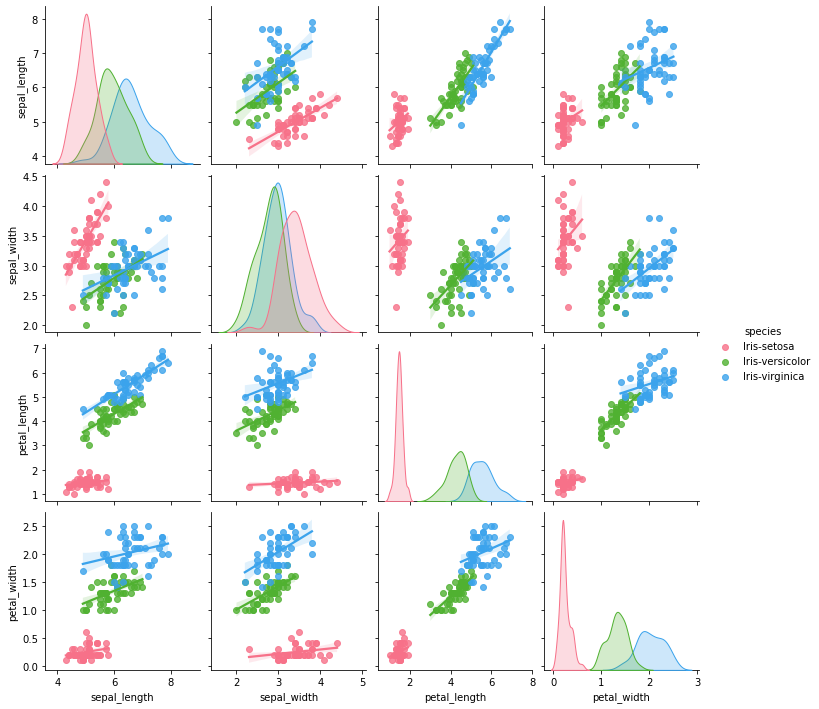

In [23]:
#DATA VISUALIZATION
plt.figure(figsize=(8,6));
sns.pairplot(iris,kind='reg',hue ='species',palette="husl" );

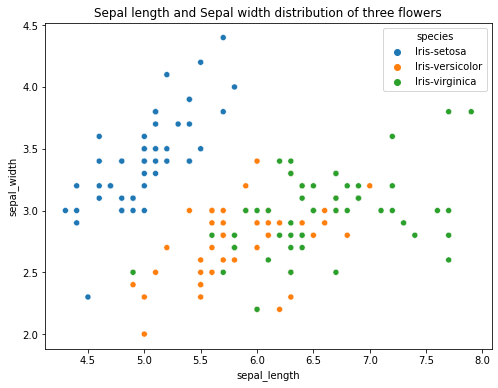

In [24]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species).set_title("Sepal length and Sepal width distribution of three flowers");

In [26]:
#IMPORTING ML CLASSIFY MODELS
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
iris['species'] = lb_make.fit_transform(iris['species'])
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,2
44,5.1,3.8,1.9,0.4,0
74,6.4,2.9,4.3,1.3,1


In [27]:
#IMPORTING MATRICS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
y = iris.species
X = iris.drop('species',axis = 1)

In [31]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn.predict(X_test)

In [34]:
# Summary of the predictions made by the KNN
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [35]:
# ACCURACY SCORE
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9777777777777777


In [36]:
#NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [37]:
y_pred = nb.predict(X_test)

In [38]:
# Summary of the predictions made by the NB
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


In [39]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [40]:
y_pred = svc.predict(X_test)

In [41]:
# Summary of the predictions made by the SVC
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


In [43]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
# Summary of the predictions made by the Random Forest
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


In [45]:
#LOGISITIC REGRESSION
df = iris[50:]
y = df.species
X = df.drop('species',axis = 1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
# Summary of the predictions made by the Logistic Regression
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  1]
 [ 0 15]]
accuracy is 0.9666666666666667
